# Analysis of the word classes in the answer, question and sentence containing answer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [2]:
upos_tags = {'NOUN': 0, 'VERB':0, 'NUM':0, 'ADJ':0, 'ADV':0, 'PROPN':0, 'PRON':0, 'AUX':0, 'ADP':0, 'DET':0, 'PUNCT':0, 'UNK':0}

In [7]:
# get the word class statistics for the root
def get_word_class_count(data, type):
    stats = copy.deepcopy(upos_tags)
    for idx,ans in data.iterrows():
        word_pos = ans[type + '_root_pos']
        # can be none!
        if word_pos == None:
            print('word has None pos tag: ', ans[type + '_root_word'])
            stats['UNK'] += 1
        else:
            stats[word_pos] += 1
    # filter out the zeros in the result
    stats_mod = copy.deepcopy(stats)
    for key, val in stats.items():
        if val == 0:
            del stats_mod[key]
    return stats_mod

In [12]:
# print stats
def print_wordcount_stats(stats, title, ylabel, filename):
    print('stats: ', stats)
    plt.bar(stats.keys(), stats.values(), color='teal')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig('../figures/word_classes/'+filename)
    plt.show()


In [13]:
# load the data
path = '../data_frames/dependency_parsed_data/df_train_cleaned.pkl'
df = pd.read_pickle(path)

stats:  {'NOUN': 950, 'VERB': 326, 'NUM': 160, 'ADJ': 42, 'ADV': 7, 'PROPN': 79, 'PRON': 12, 'ADP': 1, 'DET': 2}


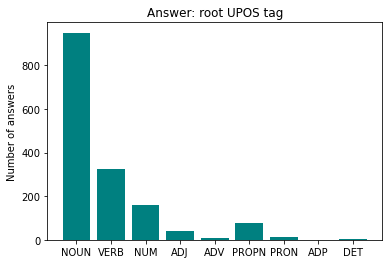

stats:  {'NOUN': 269, 'VERB': 1171, 'NUM': 3, 'ADJ': 78, 'ADV': 2, 'PROPN': 17, 'PRON': 5, 'AUX': 31, 'DET': 2, 'PUNCT': 1}


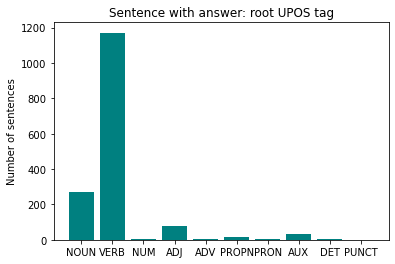

stats:  {'NOUN': 155, 'VERB': 1194, 'NUM': 2, 'ADJ': 74, 'ADV': 2, 'PROPN': 4, 'PRON': 141, 'AUX': 7}


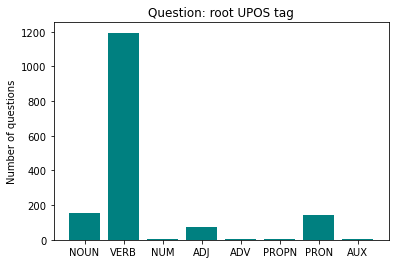

In [15]:
# PLOT STATISTICS

# ans stats
ans_stats = get_word_class_count(df, 'answer')
title_ans = 'Answer: root UPOS tag'
print_wordcount_stats(ans_stats, title_ans, 'Number of answers', 'Answer_root_class')

# ans sent stats
sent_stats = get_word_class_count(df, 'sent')
title_ans = 'Sentence with answer: root UPOS tag'
print_wordcount_stats(sent_stats, title_ans, 'Number of sentences', 'Sentence_root_class')

# question stats
q_stats = get_word_class_count(df, 'q')
title_ans = 'Question: root UPOS tag'
print_wordcount_stats(q_stats, title_ans, 'Number of questions', 'Question_root_class')
